In [2]:
import pandas as pd
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
save_file = "action_log.pt"
actions_log = torch.load(os.path.join(os.getcwd(), '..', '..', save_file)
)
print(actions_log.shape)

torch.Size([100, 3, 50, 50, 500])


In [ ]:

# Convertir actions_log en numpy array
actions_log_np = actions_log.numpy()

# Aplatir toutes les dimensions sauf la dernière (itérations)
actions_log_flat = actions_log_np.reshape(-1)

# Extraire les indices Batch, Population, Row, Col et Iteration
batch_indices = np.repeat(np.arange(actions_log.shape[0]), actions_log.shape[1] * actions_log.shape[2] * actions_log.shape[3] * actions_log.shape[4])
population_indices = np.tile(np.repeat(np.arange(actions_log.shape[1]), actions_log.shape[2] * actions_log.shape[3] * actions_log.shape[4]), actions_log.shape[0])
row_indices = np.tile(np.repeat(np.arange(actions_log.shape[2]), actions_log.shape[3] * actions_log.shape[4]), actions_log.shape[0] * actions_log.shape[1])
col_indices = np.tile(np.repeat(np.arange(actions_log.shape[3]), actions_log.shape[4]), actions_log.shape[0] * actions_log.shape[1] * actions_log.shape[2])

# Extraire l'indice de l'itération (dernière dimension)
iteration_indices = np.tile(np.arange(actions_log.shape[4]), actions_log.shape[0] * actions_log.shape[1] * actions_log.shape[2] * actions_log.shape[3])

# Créer le DataFrame avec les indices Batch, Population, Row, Col et Iteration comme colonnes
df = pd.DataFrame(actions_log_flat, columns=['Action'])

# Ajouter les indices Batch, Population, Row, Col, Iteration en tant que colonnes dans le DataFrame
df['Batch'] = batch_indices
df['Population'] = population_indices
df['Row'] = row_indices
df['Col'] = col_indices
df['Iteration'] = iteration_indices

# Réorganiser les colonnes pour mettre les indices en première position
df = df[['Batch', 'Population', 'Row', 'Col', 'Iteration', 'Action']]

# Affichage joli : configurer pandas pour afficher un tableau plus lisible
pd.set_option('display.max_rows', 20)  # Limiter le nombre de lignes visibles
pd.set_option('display.max_columns', 10)  # Limiter le nombre de colonnes visibles
pd.set_option('display.width', 1000)  # Largeur d'affichage

df


In [5]:
# Suppose que actions_log est un torch.Tensor
shape = actions_log.shape  # (Batch, Population, Row, Col, Iteration)
actions_log_np = actions_log.numpy()
actions_log_flat = actions_log_np.reshape(-1)

# Crée un tableau d'indices sans exploser la mémoire
coords = np.indices(shape).reshape(len(shape), -1).T  # shape: (total_points, 5)

# Crée le DataFrame
df = pd.DataFrame(coords, columns=['Batch', 'Population', 'Row', 'Col', 'Iteration'])
df['Action'] = actions_log_flat
df

,Batch,Population,Row,Col,Iteration,Action
0,0,0,0,0,0,0.0
1,0,0,0,0,1,0.0
2,0,0,0,0,2,0.0
3,0,0,0,0,3,0.0
4,0,0,0,0,4,0.0
...,...,...,...,...,...,...
374999995,99,2,49,49,495,0.0
374999996,99,2,49,49,496,0.0
374999997,99,2,49,49,497,0.0
374999998,99,2,49,49,498,0.0


In [6]:
df_snap = df[(df['Batch'] == 0) & (df['Population'] == 0) & (df['Iteration']==0)]
df_snap = df_snap.drop(['Batch', 'Population', 'Iteration'], axis=1)
df_snap_pivot = df_snap.pivot(index='Row', columns='Col', values='Action')  # 'Value' doit être le nom de la colonne des données

df_snap_pivot = df_snap_pivot.reset_index()

df_snap_pivot

Col,Row,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
3,3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,4,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,5,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
6,6,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
7,7,15.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,8,0.0,-1.0,0.0,0.0,-1.0,15.0,-1.0,-1.0,-1.0,...,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0
9,9,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,-1.0


In [25]:
df =df[(df['Batch'] == 0)]
df

,Batch,Population,Row,Col,Iteration,Action
0,0,0,0,0,0,0.0
1,0,0,0,0,1,0.0
2,0,0,0,0,2,0.0
3,0,0,0,0,3,0.0
4,0,0,0,0,4,0.0
...,...,...,...,...,...,...
3749995,0,2,49,49,495,-1.0
3749996,0,2,49,49,496,-1.0
3749997,0,2,49,49,497,-1.0
3749998,0,2,49,49,498,-1.0


In [26]:
tmpdf = df.groupby(['Population', 'Iteration']).agg(actions_list=('Action', list))
tmpdf['population_size'] = tmpdf['actions_list'].apply(lambda x: sum(np.array(x)>=0))
tmpdf=tmpdf.reset_index()
tmpdf

,Population,Iteration,actions_list,population_size
0,0,0,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",337
1,0,1,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",410
2,0,2,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",470
3,0,3,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",532
4,0,4,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",584
...,...,...,...,...
1495,2,495,"[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...",167
1496,2,496,"[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...",165
1497,2,497,"[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...",165
1498,2,498,"[-1.0, -1.0, -1.0, 0.0, -1.0, 4.0, -1.0, -1.0,...",165


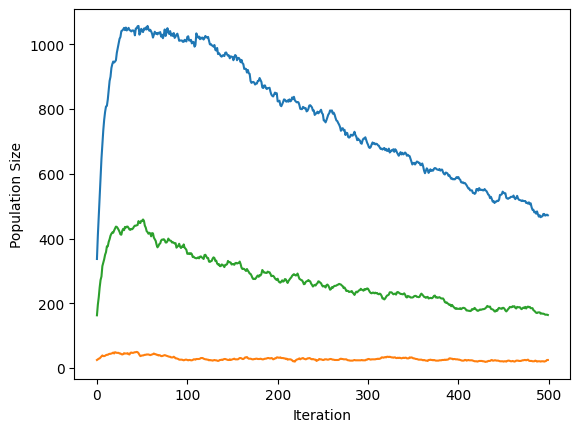

In [27]:
tmpdf[tmpdf['Population'] == 0].set_index('Iteration')['population_size'].plot()
tmpdf[tmpdf['Population'] == 1].set_index('Iteration')['population_size'].plot()
tmpdf[tmpdf['Population'] == 2].set_index('Iteration')['population_size'].plot()

plt.xlabel("Iteration")
plt.ylabel("Population Size")
plt.show()

In [33]:
tmpdf['give_fitness'] = tmpdf['actions_list'].apply(lambda x: np.sum((np.array(x) >= 1) & (np.array(x) <= 8)))
tmpdf['give_fitness_percentage'] = (tmpdf['give_fitness']/tmpdf['population_size'])*100
tmpdf

,Population,Iteration,actions_list,population_size,give_fitness,give_fitness_percentage
0,0,0,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",337,33,9.792285
1,0,1,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",410,23,5.609756
2,0,2,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",470,42,8.936170
3,0,3,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",532,36,6.766917
4,0,4,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",584,48,8.219178
...,...,...,...,...,...,...
1495,2,495,"[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...",167,13,7.784431
1496,2,496,"[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...",165,17,10.303030
1497,2,497,"[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...",165,14,8.484848
1498,2,498,"[-1.0, -1.0, -1.0, 0.0, -1.0, 4.0, -1.0, -1.0,...",165,14,8.484848


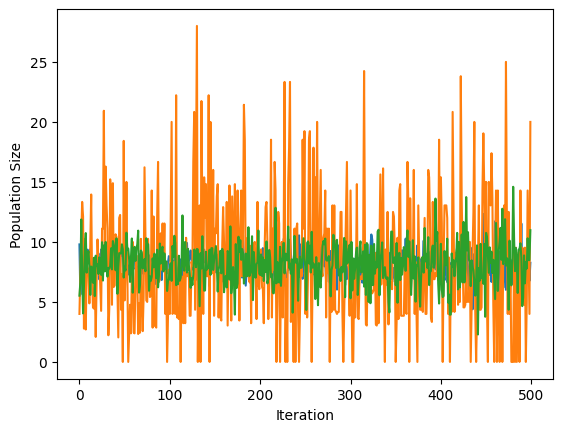

In [34]:
tmpdf[tmpdf['Population'] == 0].set_index('Iteration')['give_fitness_percentage'].plot()
tmpdf[tmpdf['Population'] == 1].set_index('Iteration')['give_fitness_percentage'].plot()
tmpdf[tmpdf['Population'] == 2].set_index('Iteration')['give_fitness_percentage'].plot()
# comme on prend le % par iteration les population les plus petit on un noise amplifé et les plus grand le reduira..

plt.xlabel("Iteration")
plt.ylabel("Population Size")
plt.show()

In [36]:
tmpdf['attack'] = tmpdf['actions_list'].apply(lambda x: np.sum((np.array(x) >= 9)))
tmpdf['attack_percentage'] = (tmpdf['attack']/tmpdf['population_size'])*100
tmpdf

,Population,Iteration,actions_list,population_size,give_fitness,give_fitness_percentage,attack,attack_percentage
0,0,0,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",337,33,9.792285,22,6.528190
1,0,1,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",410,23,5.609756,30,7.317073
2,0,2,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",470,42,8.936170,42,8.936170
3,0,3,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",532,36,6.766917,35,6.578947
4,0,4,"[0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,...",584,48,8.219178,35,5.993151
...,...,...,...,...,...,...,...,...
1495,2,495,"[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...",167,13,7.784431,15,8.982036
1496,2,496,"[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...",165,17,10.303030,13,7.878788
1497,2,497,"[-1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0,...",165,14,8.484848,11,6.666667
1498,2,498,"[-1.0, -1.0, -1.0, 0.0, -1.0, 4.0, -1.0, -1.0,...",165,14,8.484848,10,6.060606


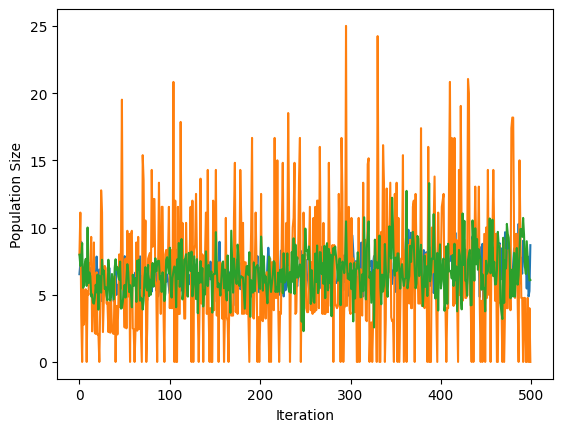

In [37]:
tmpdf[tmpdf['Population'] == 0].set_index('Iteration')['attack_percentage'].plot()
tmpdf[tmpdf['Population'] == 1].set_index('Iteration')['attack_percentage'].plot()
tmpdf[tmpdf['Population'] == 2].set_index('Iteration')['attack_percentage'].plot()
# pareil : comme on prend le % par iteration les population les plus petit on un noise amplifé et les plus grand le reduira..

plt.xlabel("Iteration")
plt.ylabel("Population Size")
plt.show()